# Pynamical: cobweb plots of the logistic map

Author: Geoff Boeing

Journal article: Boeing, G. 2016. "[Visual Analysis of Nonlinear Dynamical Systems: Chaos, Fractals, Self-Similarity and the Limits of Prediction](http://geoffboeing.com/publications/nonlinear-chaos-fractals-prediction/)." *Systems*, 4 (4), 37. doi:10.3390/systems4040037.

Blog post: http://geoffboeing.com/2015/03/chaos-theory-logistic-map/

### To draw these cobweb plots

1. Let x = 0.5
1. Start on the x-axis at the point (x, 0)
1. Draw a vertical line to the red function curve: this point has the coordinates (x, f(x))
1. Draw a horizontal line from this point to the gray diagonal line: this point has the coordinates (f(x), f(x))
1. Draw a vertical line from this point to the red function curve: this point has the coordinates (f(x), f(f(x)))
1. Repeat steps 4 and 5 recursively one hundred times

### To draw the red function curve and gray diagonal line

Run the logistic map once each for 1000 population values evenly spaced between 0 and 1. This gives us the results of the logistic equation (y values) across the entire range of possible population values (x values). The gray diagonal line is just a plot of y=x.

In [1]:
from pynamical import cobweb_plot
import pandas as pd, numpy as np, matplotlib.pyplot as plt, IPython.display as IPdisplay, glob
from PIL import Image
%matplotlib inline

## Draw cobweb plots for several values of r

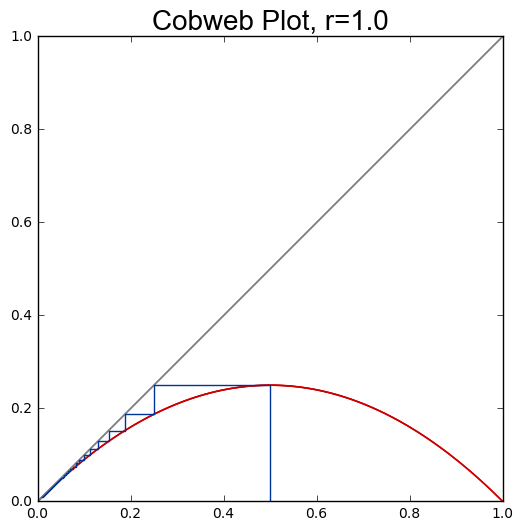

In [2]:
cobweb_plot(r=1.0, )

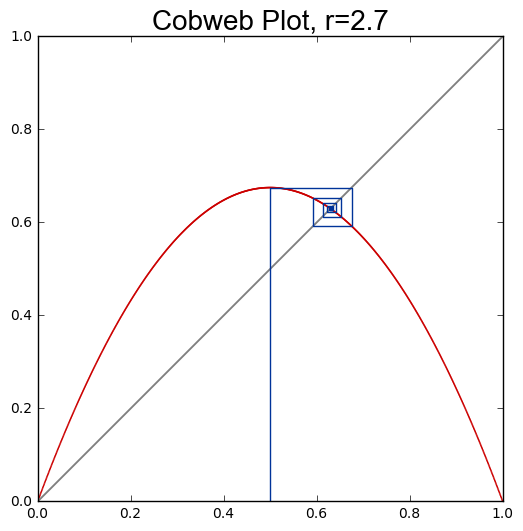

In [3]:
cobweb_plot(r=2.7)

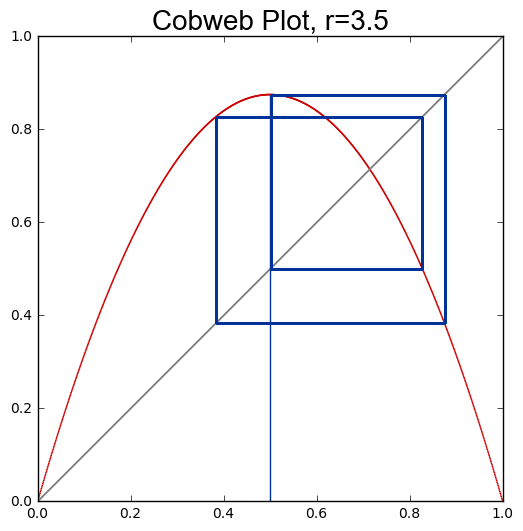

In [4]:
cobweb_plot(r=3.5)

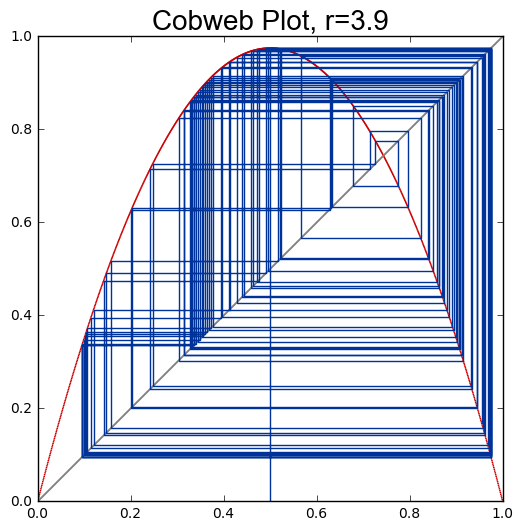

In [5]:
cobweb_plot(r=3.9)

## Demonstrate a basin of attraction with three different initial values and same r

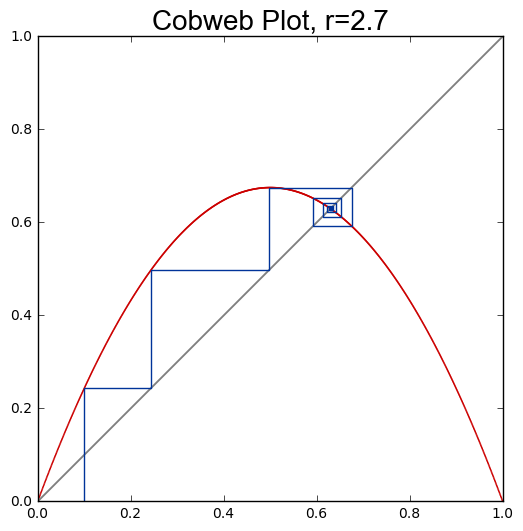

In [6]:
cobweb_plot(r=2.7, cobweb_x=0.1)

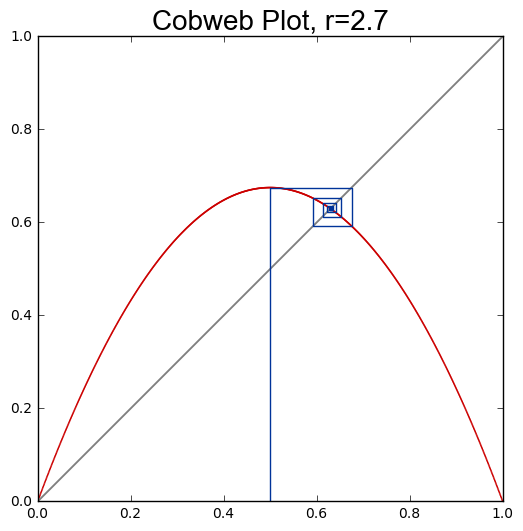

In [7]:
cobweb_plot(r=2.7, cobweb_x=0.5)

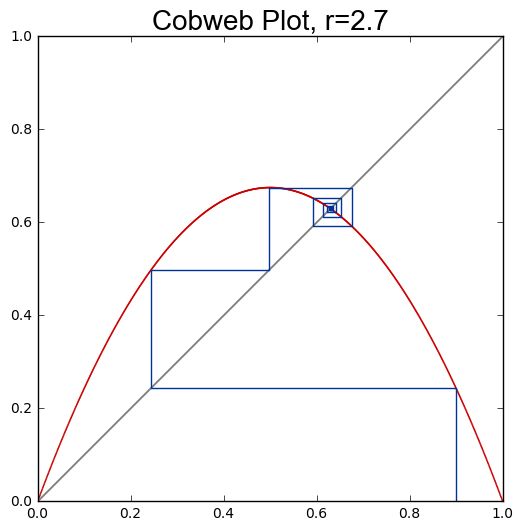

In [8]:
cobweb_plot(r=2.7, cobweb_x=0.9)

## Now animate it

In [9]:
# configure the animation: 70 rates between 0 and 3.999 plus 15 paused frames each at start and end
save_folder = 'images/cobweb-animate'
gif_filepath = 'images/animated-logistic-cobweb.gif'
start_r = 0
end_r = 3.999
steps = 70
start_end_pause = 15
rates = np.linspace(start_r, end_r, steps)
rates = np.append([start_r] * start_end_pause, rates)
rates = np.append(rates, [end_r] * start_end_pause)

In [10]:
# create a plot for each growth rate
for r, n in zip(rates, range(len(rates))):
    filename = '{:03d}'.format(n)
    title = 'Logistic Map Cobweb Plot, r={:.2f}'.format(r)
    cobweb_plot(r=r, filename=filename, folder=save_folder, dpi=90, title=title, show=False)
    plt.close()

In [11]:
# load all the static images into a list then save as an animated gif
images = [Image.open(image) for image in glob.glob('{}/*.png'.format(save_folder))]
gif = images[0]
gif.info['duration'] = 10 #milliseconds per frame
gif.info['loop'] = 0 #how many times to loop (0=infinite)
gif.save(fp=gif_filepath, format='gif', save_all=True, append_images=images[1:])

In [12]:
# pillow currently drops the 15 opening and 15 closing "paused" frames when saving the gif
saved_gif = Image.open(gif_filepath)
print(len(images))
print(saved_gif.n_frames)
print(saved_gif.info)

100
70
{'background': 0, 'version': b'GIF89a', 'extension': (b'NETSCAPE2.0', 803), 'duration': 10, 'loop': 0}


In [13]:
IPdisplay.Image(url=gif_filepath)